### Sihle_Riti_Classification_Hack

## 1. Introduction

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

In [144]:
# Standard
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Natural language Processing
import nltk
import string
import re
from sklearn.utils import resample
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# Models
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, StackingClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Performance
from sklearn.metrics import f1_score
from sklearn import metrics

# Exploratory Data Analysis
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS

## 2: Import libraries and datasets¶

In [145]:
train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')
sample = pd.read_csv('sample_submission.csv')

In [146]:
train.head(11)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


In [147]:
test.head(11)

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.
5,6,"Ke feela dilense tše hlakilego, tša pono e tee..."
6,7,<fn>(762010101403 AM) 1495 Final Gems Birthing...
7,8,Ntjhafatso ya konteraka ya mosebetsi: Etsa bon...
8,9,u-GEMS uhlinzeka ngezinzuzo zemithi yezifo ezi...
9,10,"So, on occasion, are statistics misused."


In [148]:
sample.head()

,index,lang_id
0,1,tsn
1,2,nbl


### Function below for cleaning the data:

Remove 'noisy entities' such as punctuations, numbers and extra white space. The data is further normalized by converting all letters to lowercase.

In [149]:
def clean_text(text):

    # change all words into lower case
    text = text.lower()
    
    # removing all punctuation and digits
    text = re.sub(r'[-]',' ', text)
    text = re.sub(r'[_]', ' ',  text)
    text = re.sub(r'[^\w\s]','', text)
    text = re.sub('[0-9]+', '',  text) 
    text = re.sub(r'[!"#$%&()*+,-./:;<=>?@[\]^_`{|}~âã¢¬¦¢’‘‚…]', ' ',  text)
    text = re.sub("â|ã", " ",  text)  # removes strange character 
    text = re.sub("\\s+", " ",  text)  # fills white spaces
    text =  text.lstrip()  # removes whitespaces before string
    text =  text.rstrip()  # removes whitespaces after string 
    

    text = re.sub("â|ã", " ", text)  # removes strange character    
    text = re.sub("\\s+", " ", text)  # fills white spaces
    text = text.lstrip()  # removes whitespaces before string
    text = text.rstrip()  # removes whitespaces after string 
    return text

In [150]:
#Apply the clean function to our train and test data
train['clean_text']=train['text'].apply(clean_text)
test['clean_text']=test['text'].apply(clean_text)

In [151]:
train.head(11)

,lang_id,text,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulu natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...,fa le dirisiwa lebone le tshwanetse go bontsha...


In [152]:
test.head(11)

,index,text,clean_text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...",mmasepala fa maemo a a kgethegileng a letlelel...
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,tshivhumbeo tshi fana na ngano dza vhathu
3,4,Kube inja nelikati betingevakala kutsi titsini...,kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.,winste op buitelandse valuta
5,6,"Ke feela dilense tše hlakilego, tša pono e tee...",ke feela dilense tše hlakilego tša pono e tee ...
6,7,<fn>(762010101403 AM) 1495 Final Gems Birthing...,fn am final gems birthing options zulutxtfn
7,8,Ntjhafatso ya konteraka ya mosebetsi: Etsa bon...,ntjhafatso ya konteraka ya mosebetsi etsa bonn...
8,9,u-GEMS uhlinzeka ngezinzuzo zemithi yezifo ezi...,u gems uhlinzeka ngezinzuzo zemithi yezifo ezi...
9,10,"So, on occasion, are statistics misused.",so on occasion are statistics misused


In [153]:
train.lang_id.value_counts()

nso    3000
xho    3000
tso    3000
ssw    3000
sot    3000
eng    3000
zul    3000
ven    3000
afr    3000
nbl    3000
tsn    3000
Name: lang_id, dtype: int64

# Models

We will only look at three  models which are Ridge classifier, Linear SVC classifier and Multinomial Naïve Bayes Classifier

### Spliting the data

In [154]:
X = train['text']
y = train['lang_id'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [155]:
tfidf = TfidfVectorizer(ngram_range=(3,6),analyzer='char') 

In [156]:
classifiers = [
               LinearSVC(random_state=42),
               MultinomialNB(),
               RidgeClassifier()
    ]

## Ridge Classifier 

In [157]:
%%time

Ridge = RidgeClassifier()
clf_Ridge= Pipeline([('tfidf', tfidf), ('clf', Ridge)])
clf_Ridge.fit(X_train, y_train)
y_pred_Ridge = clf_Ridge.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred_Ridge, y_test))
print('f1_score %s' % metrics.f1_score(y_test,y_pred_Ridge,average='weighted'))
print(classification_report(y_test, y_pred_Ridge))

accuracy 0.9993939393939394
f1_score 0.9993939934069507
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       300
         eng       1.00      1.00      1.00       272
         nbl       1.00      1.00      1.00       312
         nso       1.00      1.00      1.00       277
         sot       1.00      1.00      1.00       299
         ssw       1.00      1.00      1.00       320
         tsn       1.00      1.00      1.00       295
         tso       1.00      1.00      1.00       299
         ven       1.00      1.00      1.00       306
         xho       1.00      1.00      1.00       308
         zul       1.00      1.00      1.00       312

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300

Wall time: 3min 9s
Parser   : 112 ms


## Predictions Ridge Classifier 


In [158]:
%%time

y_test_pred_Ridge= clf_Ridge.predict(test['text'])
prediction_Ridge = pd.DataFrame({'index':test['index'],'lang_id':y_test_pred_Ridge})
prediction_Ridge.to_csv('classification_RC.csv',index=False)

Wall time: 6.45 s


## Linear SVC classifier

In [159]:
%%time

linear = LinearSVC(C=100, class_weight='balanced',random_state=42)
clf_linear = Pipeline([('tfidf', tfidf), ('clf', linear)])
clf_linear.fit(X_train, y_train)
y_pred_linear = clf_linear.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred_linear, y_test))
print('f1_score %s' % metrics.f1_score(y_test,y_pred_linear,average='weighted'))
print(classification_report(y_test, y_pred_linear))

C:\Users\sihle\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


accuracy 0.9993939393939394
f1_score 0.9993939934069507
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       300
         eng       1.00      1.00      1.00       272
         nbl       1.00      1.00      1.00       312
         nso       1.00      1.00      1.00       277
         sot       1.00      1.00      1.00       299
         ssw       1.00      1.00      1.00       320
         tsn       1.00      1.00      1.00       295
         tso       1.00      1.00      1.00       299
         ven       1.00      1.00      1.00       306
         xho       1.00      1.00      1.00       308
         zul       1.00      1.00      1.00       312

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300

Wall time: 3min 40s


## Predictions for Linear SVC classifier

In [160]:
%%time

y_test_pred_linear= clf_linear.predict(test['text'])
prediction_linear = pd.DataFrame({'index':test['index'],'lang_id':y_test_pred_linear})

prediction_linear.to_csv('classification_linear.csv',index=False)

Wall time: 5.79 s


In [161]:
def model(classifiers, X_train, y_train, X_test, y_test):
    
    model_summary = {}
    
   
    # Pipeline to balance the classses and then to build the model
    for clf in classifiers:
        clf_text = Pipeline([('tfidf', TfidfVectorizer(min_df=1,
                                                       max_df=0.9,
                                                       ngram_range=(1, 2))),
                             ('clf', clf)])

        # Logging the Execution Time for each model
        start_time = time.time()
        clf_text.fit(X_train, y_train)
        predictions = clf_text.predict(X_test)
        run_time = time.time()-start_time

        # Output for each model
        model_summary[clf.__class__.__name__] = {
            'F1-Macro': metrics.f1_score(y_test,
                                         predictions,
                                         average='macro'),
            'F1-Accuracy': metrics.f1_score(y_test, predictions,
                                            average='micro'),
            'F1-Weighted': metrics.f1_score(y_test,
                                            predictions,
                                            average='weighted'),
            'Execution Time': run_time}

    return pd.DataFrame.from_dict(model_summary, orient='index')

In [162]:
%%time

classifiers_df = model(classifiers, X_train, y_train, X_test, y_test)
class_df = classifiers_df.sort_values('F1-Macro', ascending=False)
class_df

Wall time: 36.3 s


,F1-Macro,F1-Accuracy,F1-Weighted,Execution Time
MultinomialNB,0.998479,0.998485,0.998484,6.011174
RidgeClassifier,0.997622,0.997576,0.997574,18.393857
LinearSVC,0.997600,0.997576,0.997574,10.187117


Wall time: 36.9 ms


<AxesSubplot:>

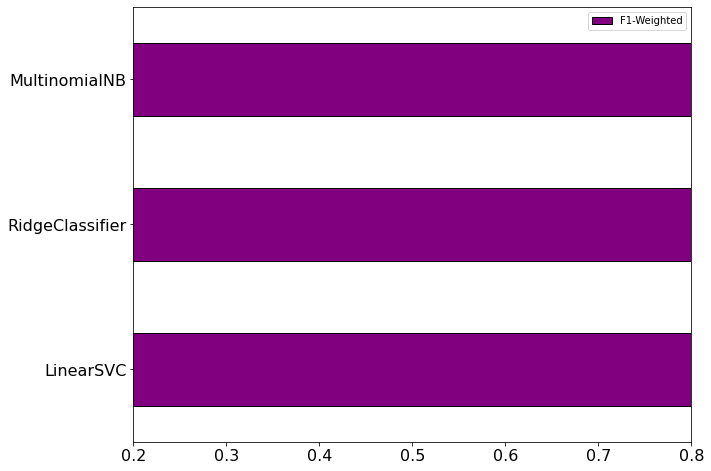

In [164]:
%%time

classifiers_df.sort_values('F1-Weighted',ascending=True).plot(y='F1-Weighted',
                                                            kind='barh', 
                                                            xlim=[0.2, 0.8], 
                                                            color= 'purple', 
                                                            edgecolor = 'Black',
                                                            figsize=(10, 8), 
                                                            fontsize=16)

## Multinomial Naïve Bayes Classifier

In [165]:
%%time

Mnb = MultinomialNB()
clf_Mnb= Pipeline([('tfidf', tfidf), ('clf', Mnb)])
clf_Mnb.fit(X, y)
y_pred_Mnb = clf_Mnb.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred_Mnb, y_test))
print('f1_score %s' % metrics.f1_score(y_test,y_pred_Mnb,average='weighted'))
print(classification_report(y_test, y_pred_Mnb))

accuracy 1.0
f1_score 1.0
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       300
         eng       1.00      1.00      1.00       272
         nbl       1.00      1.00      1.00       312
         nso       1.00      1.00      1.00       277
         sot       1.00      1.00      1.00       299
         ssw       1.00      1.00      1.00       320
         tsn       1.00      1.00      1.00       295
         tso       1.00      1.00      1.00       299
         ven       1.00      1.00      1.00       306
         xho       1.00      1.00      1.00       308
         zul       1.00      1.00      1.00       312

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300

Wall time: 1min 45s


## Predictions for Multinomial Naïve Bayes Classifier

In [166]:
%%time

y_test_pred_NB= clf_Mnb.predict(test['text'])
NB = pd.DataFrame({'index':test['index'],'lang_id':y_test_pred_NB})
NB.to_csv('NB.csv',index=False)

Wall time: 6.42 s


## Conclusion

#### Out Of these three models the best perfoming model is Multinomial Naïve Bayes Classifier 